In [1]:
import numpy as np
import pandas as pd
from db_handler import DBHandler
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from calendar import monthrange
%matplotlib inline

from scopus_handler import ScopusHandler

df1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1901-1906.csv")
df1_sources = pd.read_csv("scopus/source-results-math_cs-citescore-2018.csv", header=0)
# df2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1701-1706.csv")

df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1401-1406.csv")
df3_sources = pd.read_csv("scopus/source-results-math_cs-citescore-2013.csv", header=0)
# df3_sources = pd.read_csv("scopus/")

# df1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_life+earch_top60_1901-1906.csv")
# df2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1701-1706.csv")
# df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_life+earch_top60_1401-1406.csv")
print(len(df1), len(df3))

df1 = df1.drop_duplicates(subset=["DOI"])
# df2 = df2.drop_duplicates(subset=["DOI"])
df3 = df3.drop_duplicates(subset=["DOI"])
print(len(df1), len(df3))

14533 9598
14330 9336


In [2]:
scopus_2019_comp = ScopusHandler(df1, df1_sources, "scopus_videos_2019_comp")
scopus_2014_comp = ScopusHandler(df3, df3_sources, "scopus_videos_2014_comp")

[+]Duplicates have been dropped from df_scopus.	Before: 14330	After: 14330
[+]Duplicates have been dropped from df_scopus.	Before: 9336	After: 9336


In [4]:
k_list = [3, 5, 10, 20]
_list_sse = []
for k in k_list:
    scopus_2014_comp.cluster_scopus(num_clusters=k, videos_only=False)
    _list_sse.append(scopus_2014_comp.clustering_model.inertia_)
    print("k=%d\tIntertia=%.2f" % (k, scopus_2014_comp.clustering_model.inertia_))
plt.title('KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(k_list, _list_sse)
plt.scatter(k_list, _list_sse)
plt.show()

[+]Assigning new embedder instance.
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 96	Ratio: 0.010
# Total videos: 143	# Target videos: 138	Ratio: 0.965
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
# Total elements in plot: 8957


KeyError: 'title'

In [5]:
scopus_2014_comp.clustering_model.inertia_  # k=3

770965.0625

In [3]:
k_list = [3, 5, 10, 20]
_list_sse = [770965.0625]
for k in k_list[1:]:
    scopus_2014_comp.cluster_scopus(num_clusters=k, videos_only=False)
    _list_sse.append(scopus_2014_comp.clustering_model.inertia_)
    print("k=%d\tIntertia=%.2f" % (k, scopus_2014_comp.clustering_model.inertia_))
plt.title('KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(k_list, _list_sse)
plt.scatter(k_list, _list_sse)
plt.show()

[+]Assigning new embedder instance.
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 96	Ratio: 0.010
# Total videos: 143	# Target videos: 138	Ratio: 0.965
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
# Total elements in plot: 8957


TypeError: 'NoneType' object is not iterable

In [4]:
scopus_2014_comp.clustering_model.inertia_  # k=5

743132.375

[+]Assigning new embedder instance.
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 96	Ratio: 0.010
# Total videos: 143	# Target videos: 138	Ratio: 0.965
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
# Total elements in plot: 8957


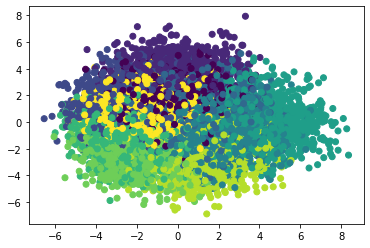

k=10	Intertia=705083.06
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 96	Ratio: 0.010
# Total videos: 143	# Target videos: 138	Ratio: 0.965
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
# Total elements in plot: 8957


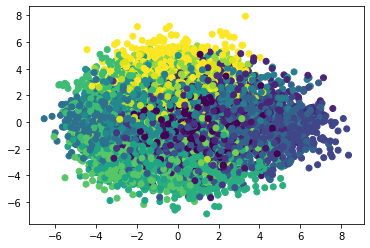

k=20	Intertia=667719.69


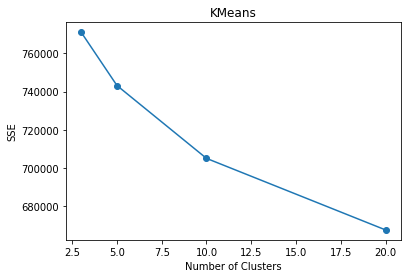

In [3]:
k_list = [3, 5, 10, 20]
_list_sse = [770965.0625, 743132.375]
for k in k_list[2:]:
    scopus_2014_comp.cluster_scopus(num_clusters=k, videos_only=False)
    _list_sse.append(scopus_2014_comp.clustering_model.inertia_)
    print("[+]k=%d\tIntertia=%.2f" % (k, scopus_2014_comp.clustering_model.inertia_))
plt.title('KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(k_list, _list_sse)
plt.scatter(k_list, _list_sse)
plt.show()

次元圧縮方法：TSNE, UMAP等…

可視化でうまくいってないなら、冠詞、固有名詞のせいでクラスタリングがうまくいってない可能性もある

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 96	Ratio: 0.010
# Total videos: 143	# Target videos: 138	Ratio: 0.965
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
# Total elements in plot: 8957


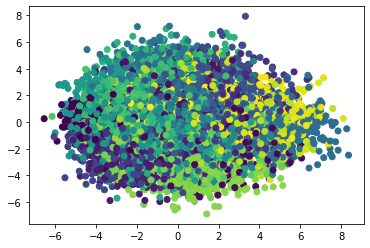

[+]k=40	Intertia=632158.38
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 96	Ratio: 0.010
# Total videos: 143	# Target videos: 138	Ratio: 0.965
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
# Total elements in plot: 8957


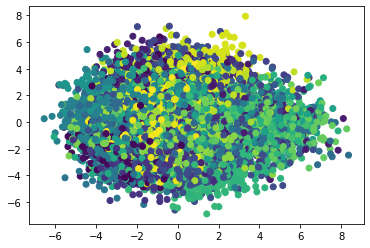

[+]k=80	Intertia=599063.44


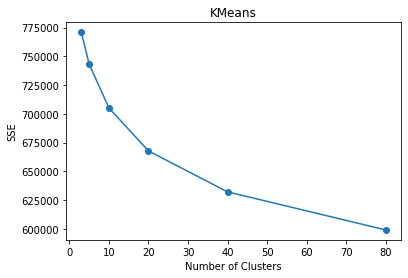

In [6]:
k_list = [3, 5, 10, 20, 40, 80]
_list_sse = [770965.0625, 743132.375, 705083.06, 667719.69]
for k in k_list[4:]:
    scopus_2014_comp.cluster_scopus(num_clusters=k, videos_only=False)
    _list_sse.append(scopus_2014_comp.clustering_model.inertia_)
    print("[+]k=%d\tIntertia=%.2f" % (k, scopus_2014_comp.clustering_model.inertia_))
plt.title('KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(k_list, _list_sse)
plt.scatter(k_list, _list_sse)
plt.show()